<a href="https://colab.research.google.com/github/putricha/college-machine-learning/blob/main/ML_Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama Anggota Kelompok
1. Ahmad Taufiq Hidayatulloh - 2241720207
2. Lucky Kurniawan Langoday - 2241720168
3. Putri Norchasana - 2241720036
4. Raffy Jamil Octavialdy - 2241720082

# KUIS 2 PEMBELAJARAN MESIN
Face Detection dan Face Recognition
# Intro

Pada kuis ini, Anda diminta untuk melakukan face detection dan face recognition pada wajah dengan menggunakan dataset primer (dataset wajah yang kalian kumpulkan sendiri).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Gunakan pre-trained model haarcascade_frontalface_default.xml untuk face detection
2. Gunakan pre-trained model faceNet untuk face recognition
3. Gunakan model CNN untuk face recognition

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import os

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## 1. Gunakan pre-trained model `haarcascade_frontalface_default.xml` untuk face detection

In [ ]:
imagePath = "/content/drive/MyDrive/PCVK/Images/kartini.jpg"
img = cv2.imread(imagePath)
img.shape

(700, 534, 3)

In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape

(700, 534)

In [ ]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [ ]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 533.5, 699.5, -0.5)

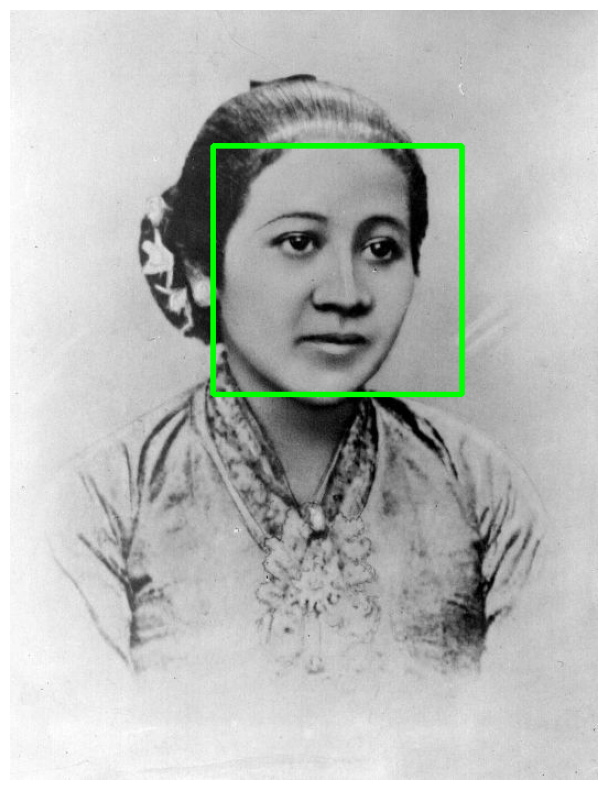

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

## 2. Gunakan pre-trained model faceNet untuk face recognition

In [ ]:
pip install keras-facenet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.5 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=071aa63eb48683779bb3f594ac7fe2d0abe860a591910835b9bdb5c9934e0e4f
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
import os
from os import listdir
from PIL import Image as Img
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import load_model
from keras_facenet import FaceNet
import numpy as np
import tensorflow as tf

import pickle
import cv2

In [ ]:
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
MyFaceNet = FaceNet()

In [ ]:
folder='dataset/'
database = {}

for filename in listdir(folder):

    path = folder + filename
    gbr1 = cv2.imread(folder + filename)

    wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)

    if len(wajah)>0:
        x1, y1, width, height = wajah[0]
    else:
        x1, y1, width, height = 1, 1, 10, 10

    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Img.fromarray(gbr) # konversi dari OpenCV ke PIL
    gbr_array = asarray(gbr)

    face = gbr_array[y1:y2, x1:x2]

    face = Img.fromarray(face)
    face = face.resize((160,160))
    face = asarray(face)

    face = expand_dims(face, axis=0)
    signature = MyFaceNet.embeddings(face)

    database[os.path.splitext(filename)[0]]=signature

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [ ]:
myfile = open("data.pkl", "wb")
pickle.dump(database, myfile)
myfile.close()

In [ ]:
database

{'Siwon': array([[ 4.98717725e-02, -2.43454315e-02, -1.24686174e-02,
          7.44629949e-02,  2.83249915e-02,  9.43747628e-03,
          4.63383878e-03,  4.49346602e-02,  3.41825709e-02,
         -6.67069433e-03, -3.42621803e-02, -3.28827812e-03,
         -2.12701596e-03,  2.95053367e-02, -4.59247343e-02,
         -4.99599166e-02, -1.10943634e-02,  8.38387460e-02,
         -4.01629880e-02, -1.80434398e-02, -6.57014623e-02,
          5.41665731e-03,  6.97412202e-03,  5.50575443e-02,
         -1.46795250e-02, -4.36825212e-03,  1.39406265e-03,
          4.24551591e-02, -1.66147668e-02, -2.18856204e-02,
          4.43355218e-02,  3.64155471e-02,  1.53959785e-02,
         -5.69555759e-02,  1.85810570e-02, -5.42318821e-02,
         -7.21986666e-02,  2.16166098e-02, -9.72180292e-02,
         -1.62833109e-02, -3.81421894e-02,  6.56252801e-02,
         -5.23591302e-02, -3.19743827e-02,  5.30410893e-02,
         -8.72066524e-03, -2.37016287e-02,  1.17289480e-02,
          1.89274140e-02, -1.70

In [ ]:
myfile = open("data.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

In [ ]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

In [ ]:
def findFaces(data):
  gbr1 = js_to_image(data)
  gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
  gbr = Img.fromarray(gbr) # konversi dari OpenCV ke PIL
  gbr_array = asarray(gbr)

  wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)

  for (x1,y1,w,h) in wajah:
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + w, y1 + h

      face = gbr_array[y1:y2, x1:x2]

      face = Img.fromarray(face)
      face = face.resize((160,160))
      face = asarray(face)

      face = expand_dims(face, axis=0)
      signature = MyFaceNet.embeddings(face)

      min_dist=100
      identity=' '
      for key, value in database.items() :
        dist = np.linalg.norm(value-signature)
        if dist < min_dist:
          min_dist = dist
          identity = key

      cv2.putText(gbr1,identity, (x1,y1),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)
      cv2.rectangle(gbr1,(x1,y1),(x2,y2), (0,255,0), 2)

  filename='photo.jpg'
  cv2.imwrite(filename, gbr1)

  return filename

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))

  filename=findFaces(data)

  return filename

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Saved to photo.jpg


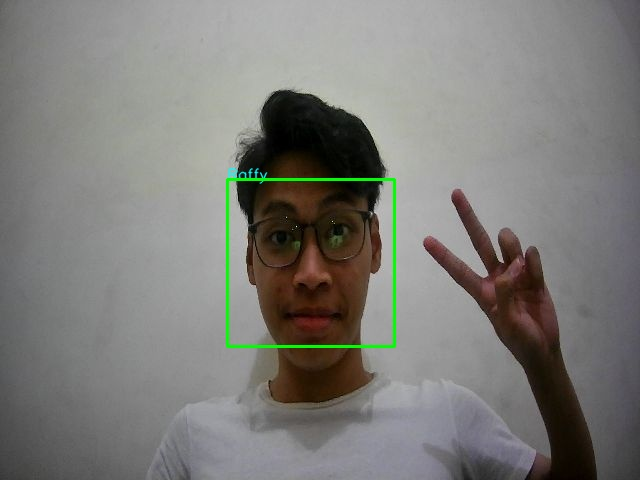

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## 3. Gunakan model CNN untuk face recognition

### Image Agumentation with Preprocessing

In [ ]:
# import libraries
import tensorflow
from tensorflow import keras

train_images = r"/content/drive/MyDrive/Semester 5/dataset/Face Images/Final Training Images"

## Image Preprocessing using keras

# As we know deep-learning is hungry for data, the data we have is only limited.
# so lets perform **Image Agumentation** to create different versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
# No transformations are made on the test data
test_gen = ImageDataGenerator()

# Generating training data
training_data = train_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

# generating test data
testing_data = test_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

# Printing class labels for each face
testing_data.class_indices

Found 244 images belonging to 16 classes.
Found 244 images belonging to 16 classes.


{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

### Mapping of class_labels with numeric value for classification

In [ ]:
# training_data have numeric tag for each face
Train_class = training_data.class_indices

# lets store them in a dictionary with swap for future reference
Result_class = {}
for value_tag, face_tag in zip(Train_class.values(),Train_class.keys()):
    Result_class[value_tag] = face_tag


# use pickle to save the mapping's
import pickle
with open(r'/content/drive/MyDrive/Semester 5/dataset/Face Images/ResultMap.pkl','wb') as Final_mapping:
    pickle.dump(Result_class,Final_mapping)

In [ ]:
print("Mapping of Face and its numeric value",Result_class)

Mapping of Face and its numeric value {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}


In [ ]:
Output_Neurons=len(Result_class)
print('\n The Number of output neurons: ', Output_Neurons)


 The Number of output neurons:  16


### Building the CNN Architecture, Model Compilation and Training
In the below code snippet, I have created a CNN model with

hidden layers of convolution
hidden layers of max pooling
layer of flattening
Hidden ANN layer
output layer with 16-neurons (one for each face)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
'''Initializing the Convolutional Neural Network'''
Model = Sequential()


''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (100,100,3) because we are using TensorFlow backend
# It means 3 matrix of size (100x100) pixels representing Red, Green and Blue components of pixels
'''

Model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), input_shape = (100,100,3),activation='relu'))

'''# Maxplooing layer'''

Model.add(MaxPool2D(pool_size=(2,2)))

'''Adding additional layers  of convolution and
        maxpooling for better model accuracy and performance'''

Model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

'''# Add a flatten layer to convert the vector to one dimensional'''
Model.add(Flatten())

'''Add dense layers and Initialize weights using
                kernal initializer for better learing of image features and classification'''

Model.add(Dense(64,activation='relu'))
Model.add(Dense(Output_Neurons,activation='softmax'))

'''Perform Model Compilation'''

Model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])


'''# Using Early stopping to reduce the training time'''

from keras.callbacks import EarlyStopping
call = EarlyStopping(
                    min_delta=0.005,
                    patience=5,
                     verbose=1
                    )

import time
# Measuring the time taken by the model to train
StartTime=time.time()

'''# Model Training'''
Model.fit(training_data,
          epochs = 30,
          validation_data=testing_data,
                   callbacks=call)

Endtime = time.time()
print('Total Training Time taken: ',round((Endtime-StartTime)/60),'Minutes')

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 720ms/step - Accuracy: 0.0953 - loss: 266.5265 - val_Accuracy: 0.0656 - val_loss: 55.7388
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 474ms/step - Accuracy: 0.0992 - loss: 32.3003 - val_Accuracy: 0.0697 - val_loss: 5.6378
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 652ms/step - Accuracy: 0.0777 - loss: 4.0148 - val_Accuracy: 0.2336 - val_loss: 2.5480
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 479ms/step - Accuracy: 0.1309 - loss: 2.6813 - val_Accuracy: 0.1967 - val_loss: 2.4418
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 493ms/step - Accuracy: 0.1938 - loss: 2.4092 - val_Accuracy: 0.3648 - val_loss: 1.9831
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 471ms/step - Accuracy: 0.2963 - loss: 2.0681 - val_Accuracy: 0.4385 - val_loss: 1.7073
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 713ms/step - Accuracy: 0.4567 - loss: 1.7321 - val_Accuracy: 0.6516 - val_loss: 1.1578
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 470ms/step - Accuracy: 0.6078 - loss: 1.3620 - val_Accuracy: 0.7295 - v

### Using the Classifier to make predictions on unseen test images

In [ ]:
import numpy as np
from keras.preprocessing import image
import os
import glob

In [ ]:
''' Making single predictions '''

ImagePath=r"/content/drive/MyDrive/Semester 5/dataset/Face Images/Final Training Images/face4/image_0054_Face_1.jpg"
test_image=image.load_img(ImagePath,target_size=(100, 100))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=Model.predict(test_image,verbose=0)

print('------------------------------')
print('Prediction is: ',Result_class[np.argmax(result)])

------------------------------
Prediction is:  face4


In [ ]:
''' Making multiple predictions '''

## Loading all the image paths from final testing folder for prediction
main_ = r"/content/drive/MyDrive/Semester 5/dataset/Face Images/Final Testing Images/face6"
img_paths = glob.glob(os.path.join(main_,'*.jpg'))

print(img_paths[0:5]) # every image will be a PIL object
print('---------------------------')

for path in img_paths:
    test_image = image.load_img(path,target_size=(100,100))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis =0)
    result = Model.predict(test_image,verbose=0)
    print('Prediction: ',Result_class[np.argmax(result)])

['/content/drive/MyDrive/Semester 5/dataset/Face Images/Final Testing Images/face6/3face6.jpg', '/content/drive/MyDrive/Semester 5/dataset/Face Images/Final Testing Images/face6/2face6.jpg', '/content/drive/MyDrive/Semester 5/dataset/Face Images/Final Testing Images/face6/1face6.jpg', '/content/drive/MyDrive/Semester 5/dataset/Face Images/Final Testing Images/face6/4face6.jpg']
---------------------------
Prediction:  face6
Prediction:  face6
Prediction:  face6
Prediction:  face6
